# EDA on Titanic dataset 

In [1]:
# Variable	Definition	   Key
# survival	Survival	   0 = No, 1 = Yes
# pclass	    Ticket class   1 = 1st, 2 = 2nd, 3 = 3rd
# sex	        Sex	
# Age	        Age in years	
# sibsp	    # of siblings / spouses aboard the Titanic	
# parch	    # of parents / children aboard the Titanic	
# ticket	    Ticket number	
# fare	    Passenger fare	
# cabin	    Cabin number	
# embarked    Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
# Loading datset
ttnc = sns.load_dataset('titanic')
ttnc['age'] = ttnc['age'].fillna(0)
ttnc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# setting the windows size of the seaborn
sns.set(style='whitegrid',
        color_codes = True)
plt.rcParams['figure.figsize'] = [15,5]
plt.rcParams['figure.dpi'] = 100

In [24]:
ttnc.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

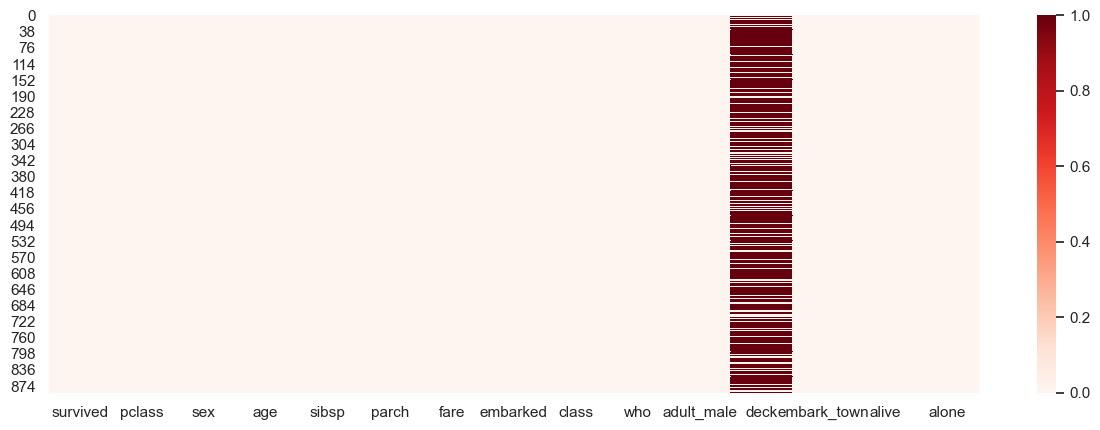

In [25]:
sns.heatmap(data = ttnc.isnull(), cmap = 'Reds', cbar = True)
#  it is to check is there any null values in the data as you see in the heat map we can identify it easily

In [26]:
# to get the correlation among the each column 
cormat = ttnc.corr()
cormat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500,0.094035,0.135207
age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516,0.120022,0.030880
sibsp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.120022,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.030880,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

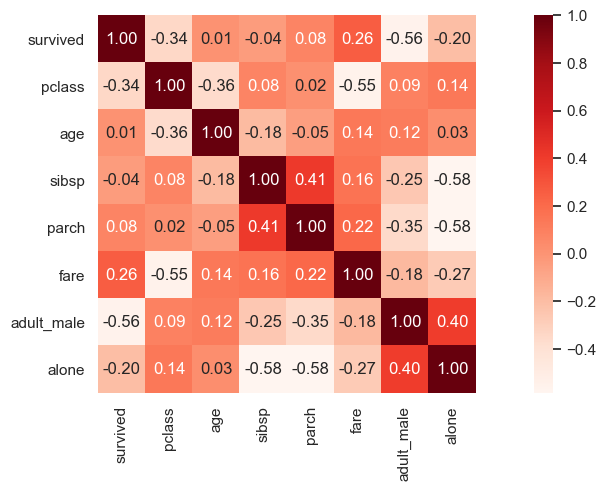

In [27]:
sns.heatmap(cormat, annot = True, square = True, cmap = 'Reds', cbar = True, fmt = '.2f')

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

<AxesSubplot:xlabel='age'>

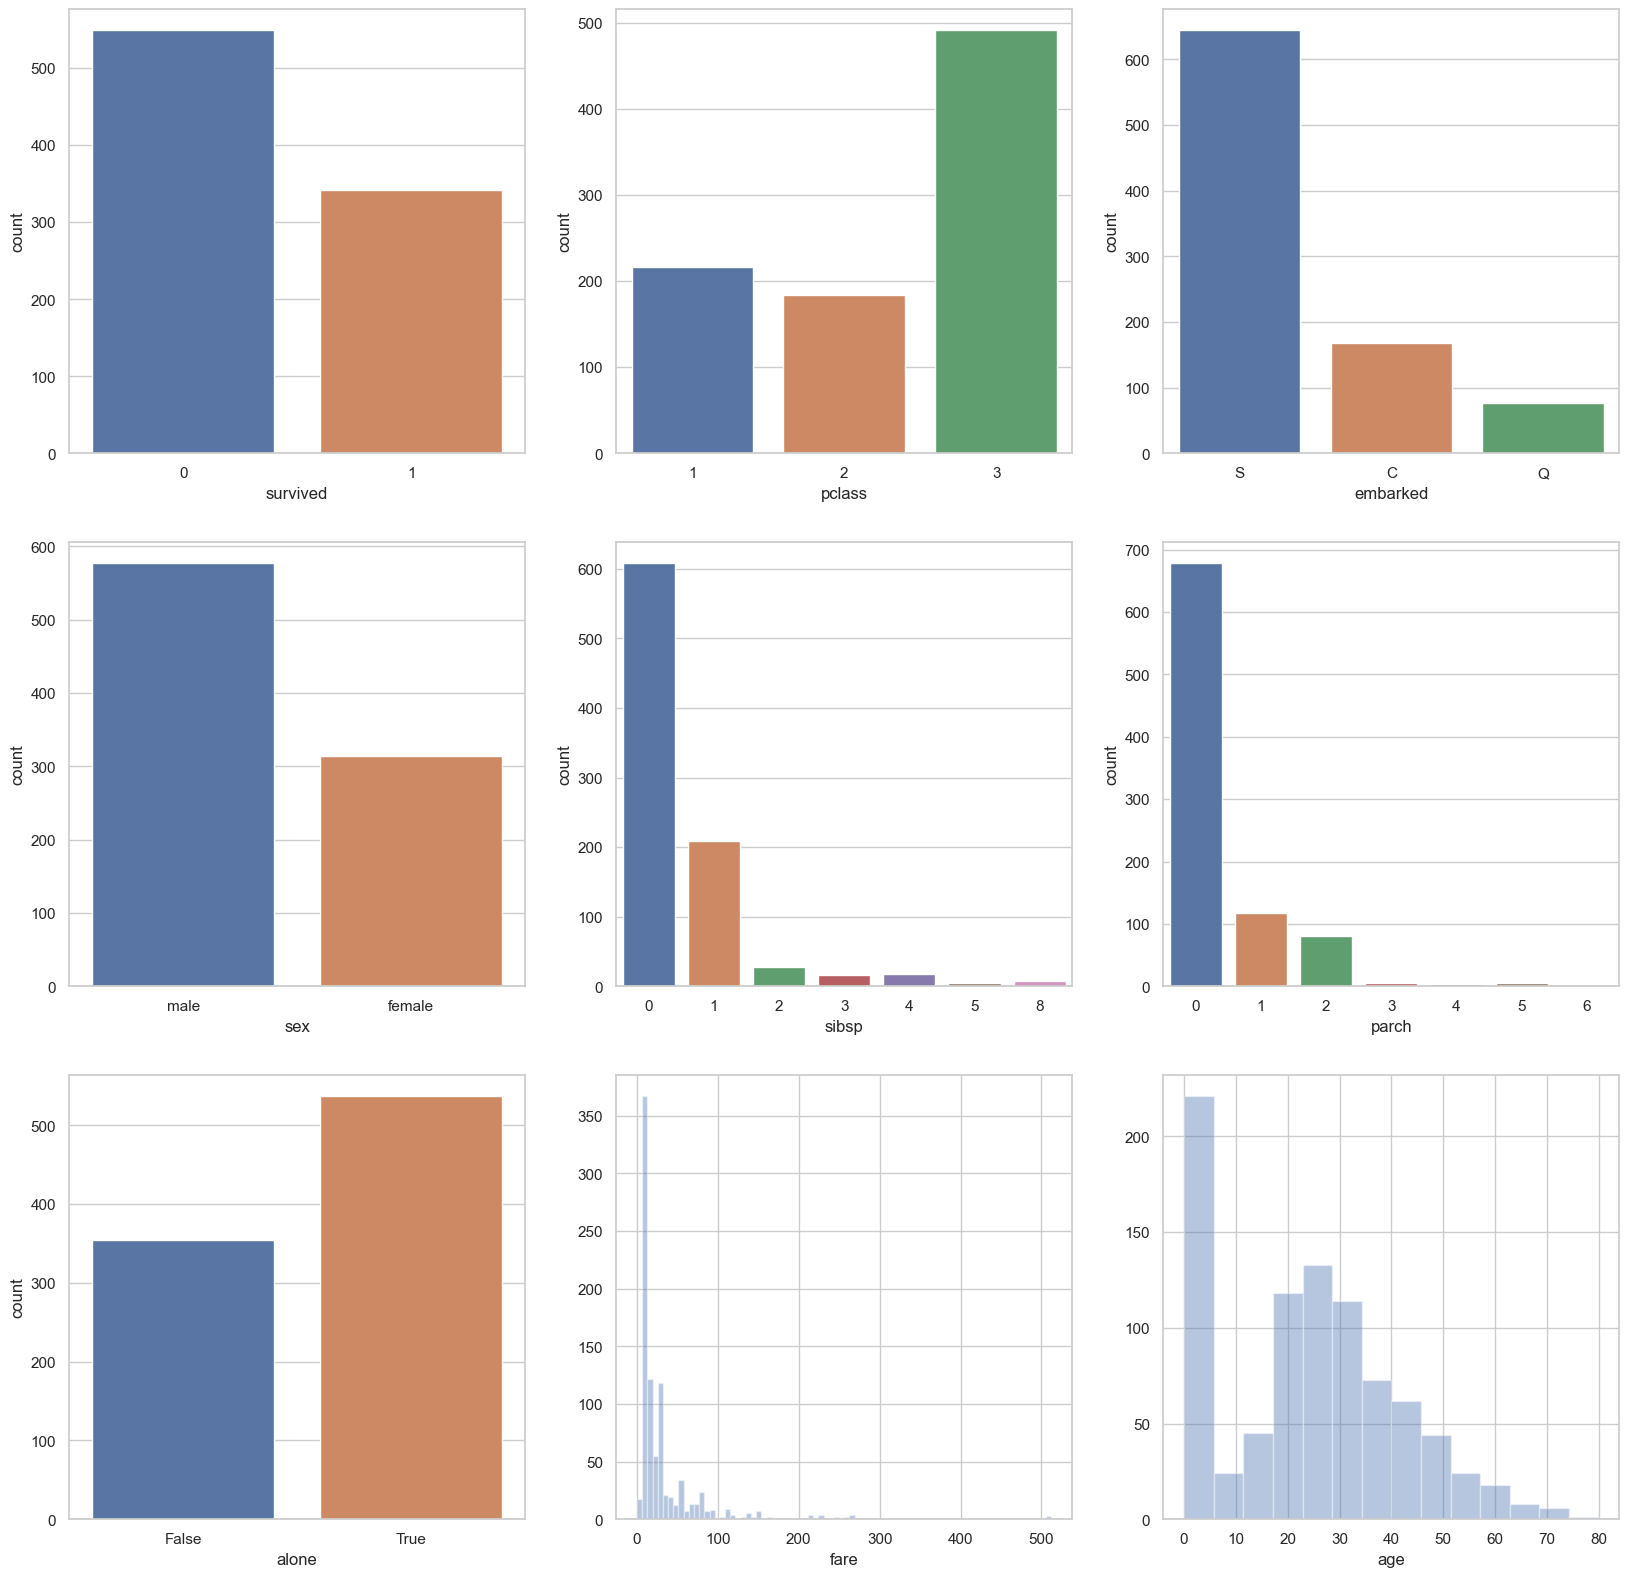

In [28]:
cnv, ax = plt.subplots(3,3, figsize = (20,20))
sns.countplot('survived', data = ttnc, ax = ax[0][0])
sns.countplot('pclass', data = ttnc, ax = ax[0][1])
sns.countplot('embarked', data = ttnc, ax = ax[0][2])
sns.countplot('sex', data = ttnc, ax = ax[1][0])
sns.countplot('sibsp', data = ttnc, ax = ax[1][1])
sns.countplot('parch', data = ttnc, ax = ax[1][2])
sns.countplot('alone', data = ttnc, ax = ax[2][0])
sns.distplot(ttnc['fare'], ax = ax[2][1], kde = False, bins = 80)
# sns.countplot('age', data = ttnc, ax = ax[2][2])
sns.distplot(ttnc['age'], ax = ax[2][2], kde = False) # 

<AxesSubplot:xlabel='fare'>

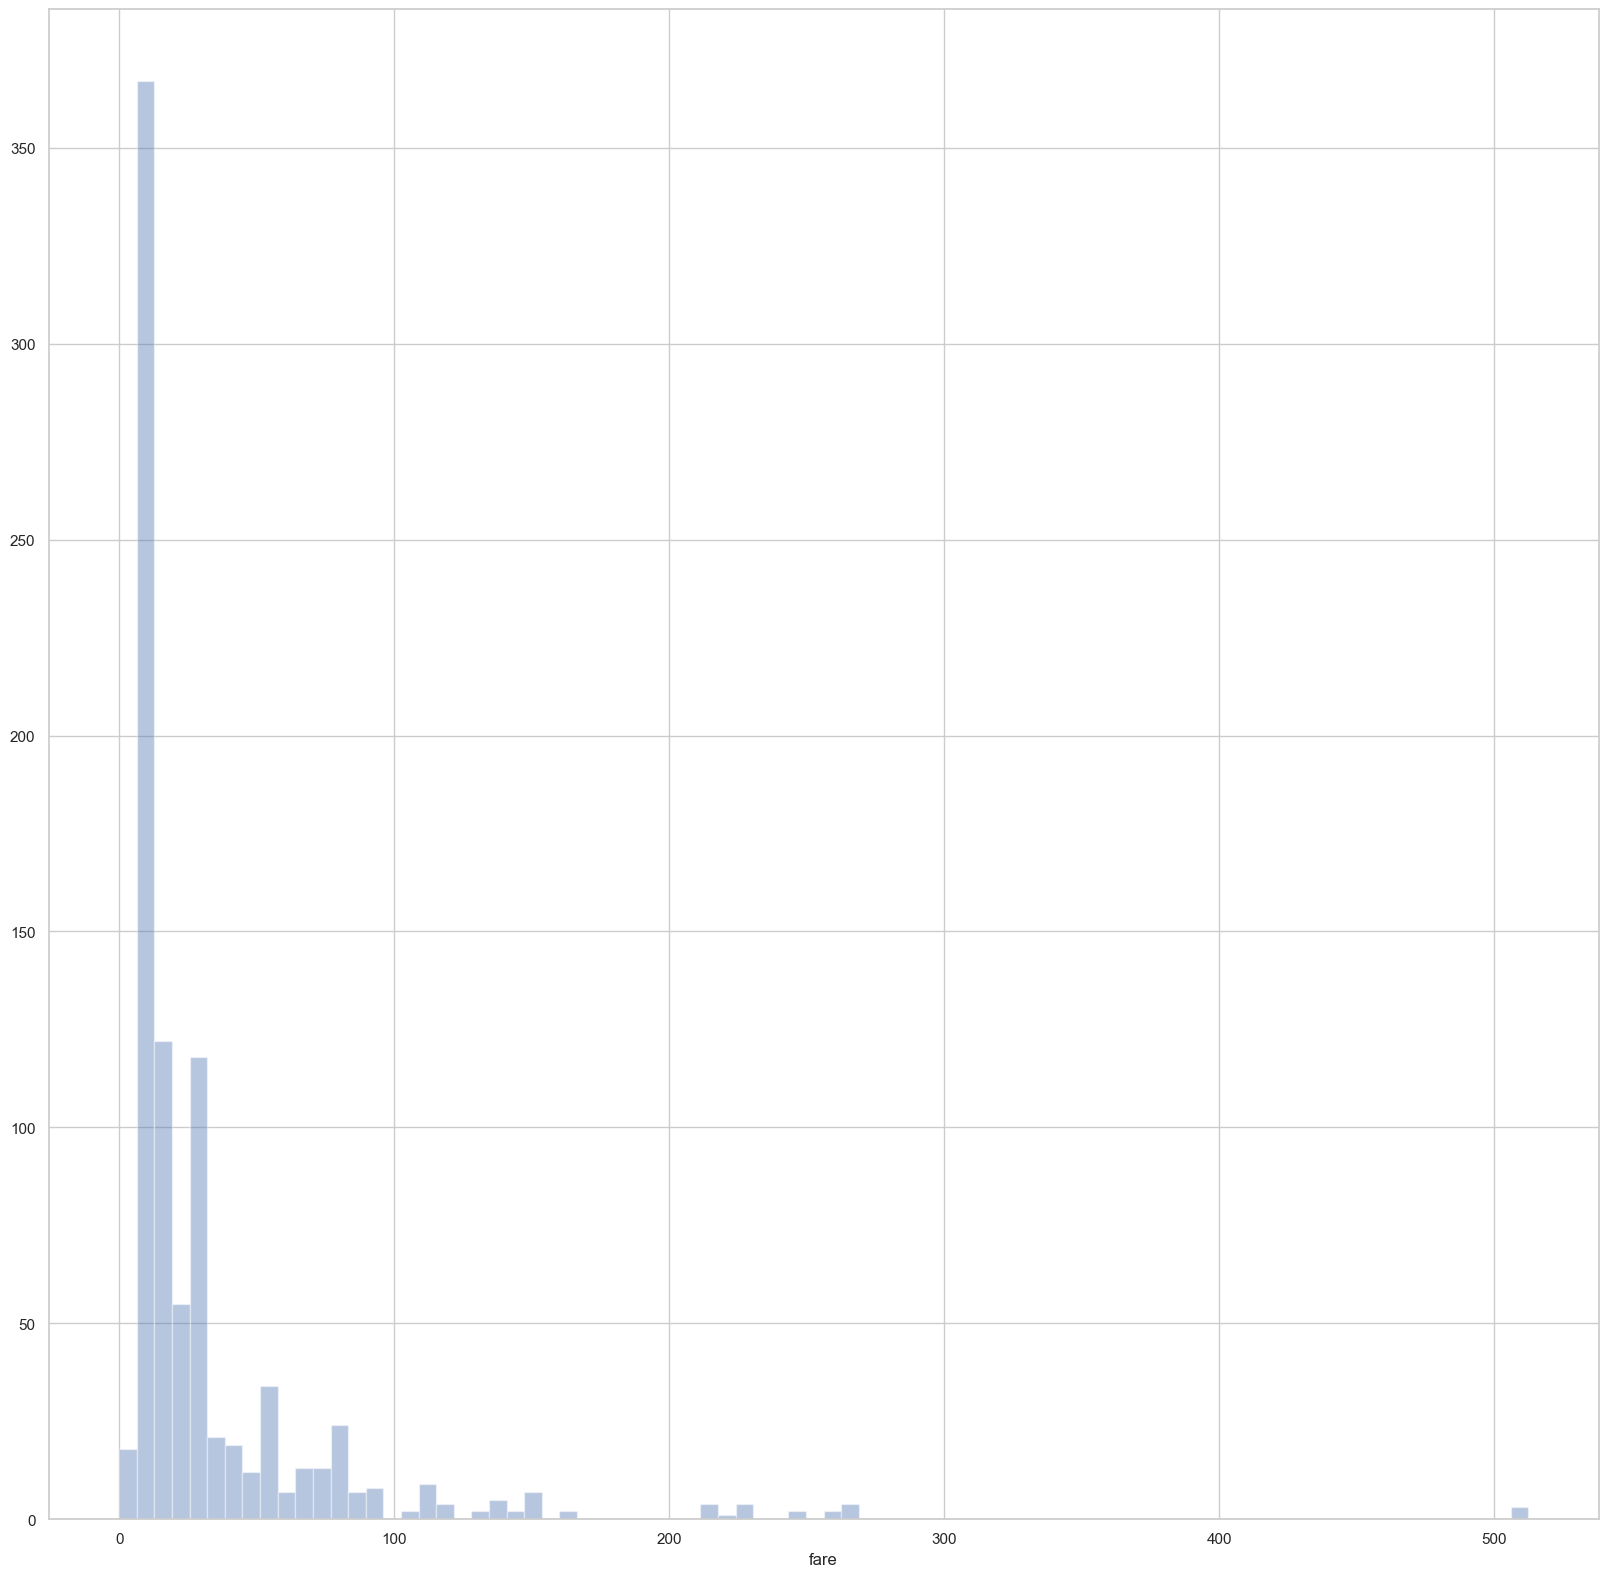

In [29]:
cnv, ax = plt.subplots(figsize = (20,20))
sns.distplot(ttnc['fare'], kde = False, bins = 80)

# Analysis on survived columns

In [30]:
ttnc['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

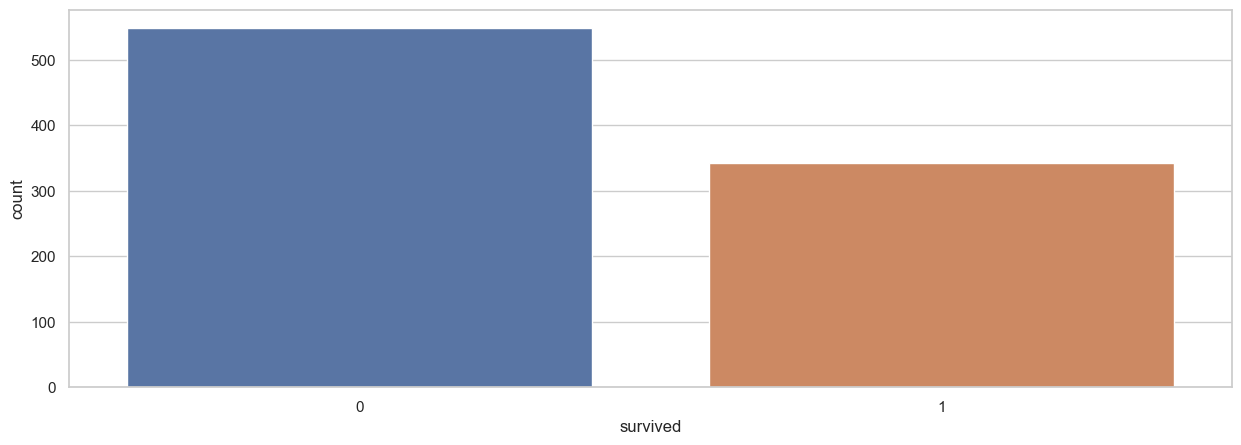

In [31]:
sns.countplot('survived', data = ttnc)

<AxesSubplot:ylabel='Frequency'>

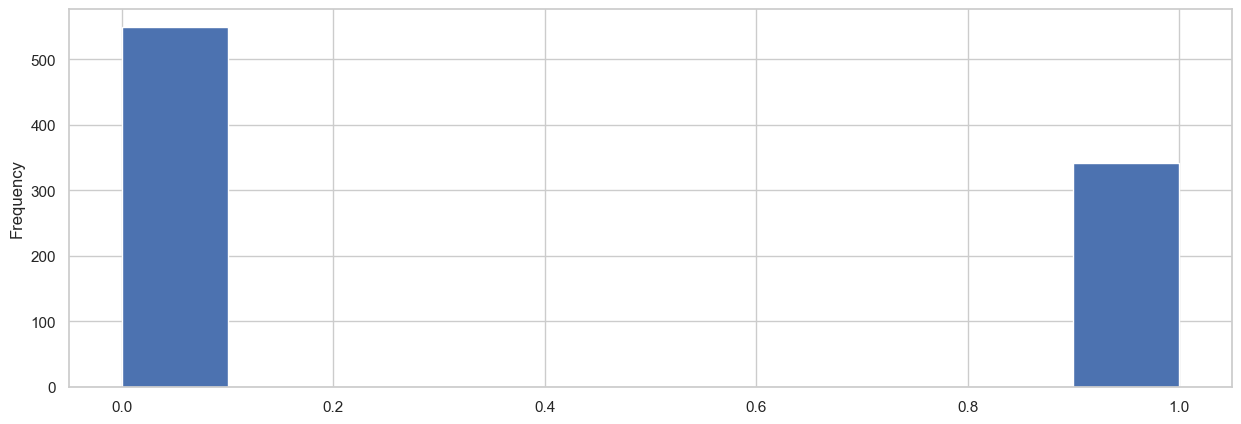

In [32]:
ttnc['survived'].plot.hist()

<AxesSubplot:ylabel='survived'>

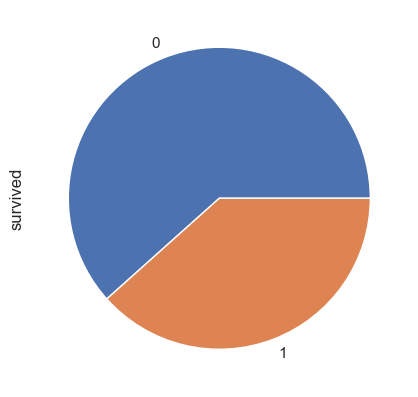

In [33]:
ttnc['survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='survived'>

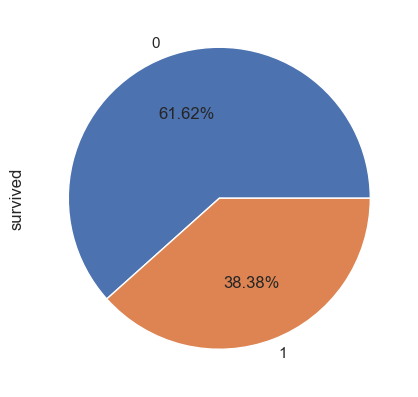

In [35]:
ttnc['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

# EDA on Passenger Class

In [36]:
ttnc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
ttnc.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

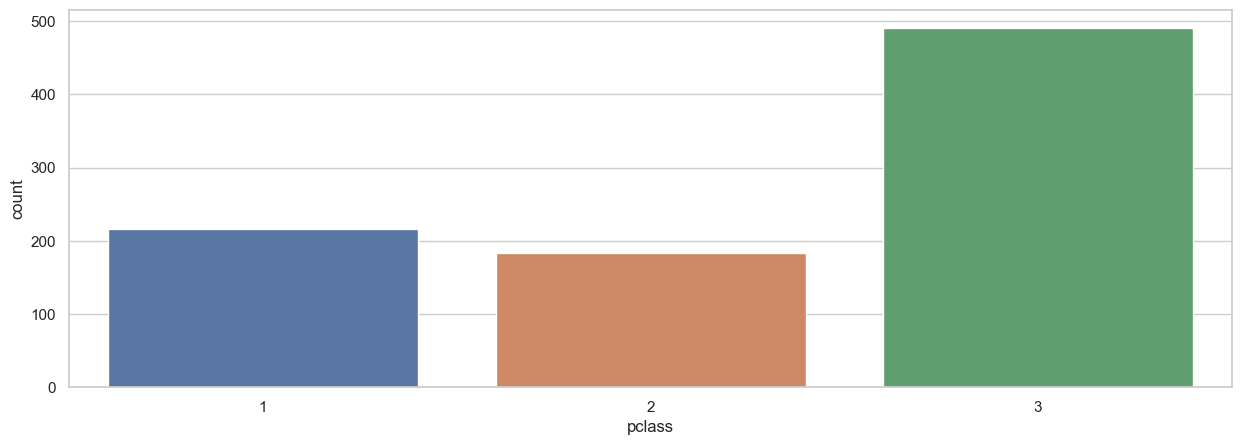

In [38]:
sns.countplot('pclass', data = ttnc)

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

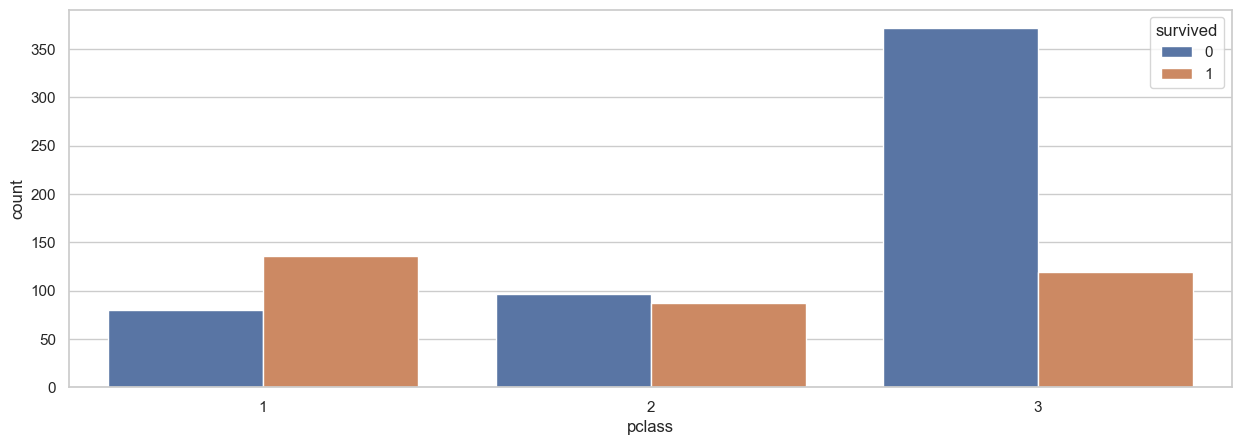

In [39]:
sns.countplot('pclass', data = ttnc, hue = 'survived')

<AxesSubplot:ylabel='pclass'>

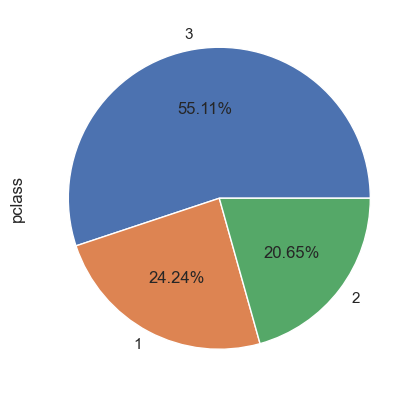

In [40]:
ttnc['pclass'].value_counts().plot.pie(autopct = '%1.2f%%')

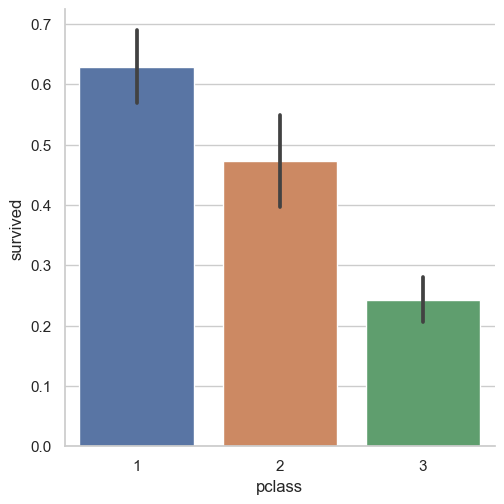

In [44]:
sns.catplot(x = 'pclass', y = 'survived', data = ttnc, kind = 'bar')

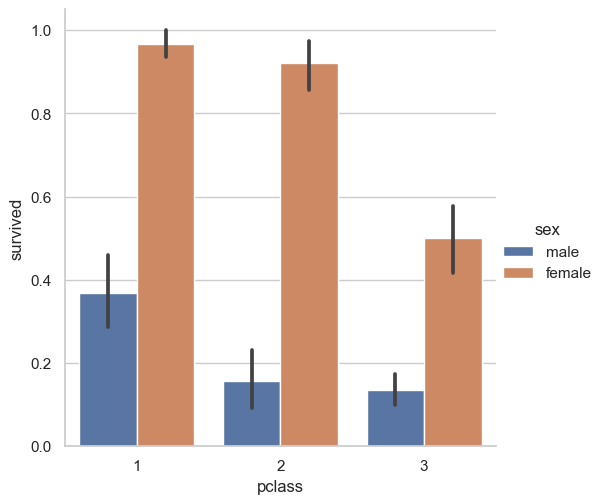

In [41]:
sns.catplot(x = 'pclass', y = 'survived', data = ttnc, kind = 'bar', hue = 'sex')

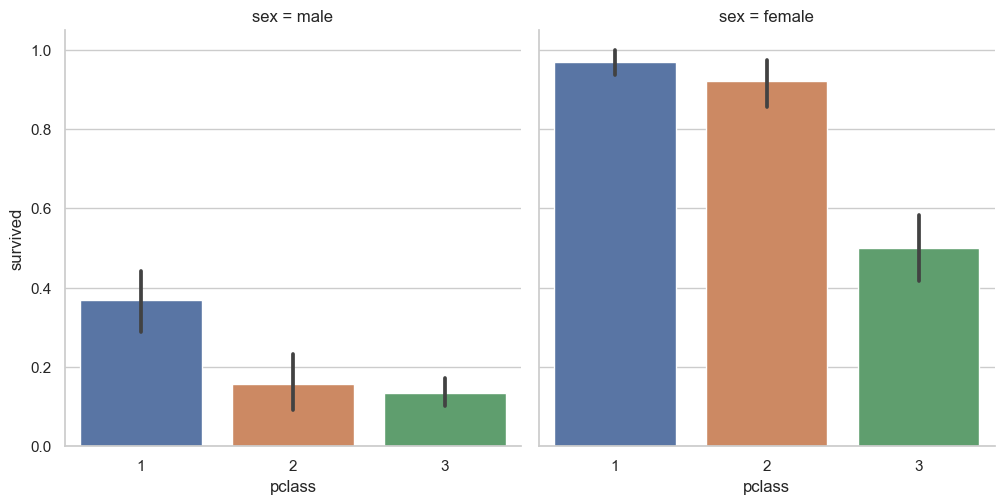

In [42]:
sns.catplot(x = 'pclass', y = 'survived', data = ttnc, kind = 'bar', col = 'sex')

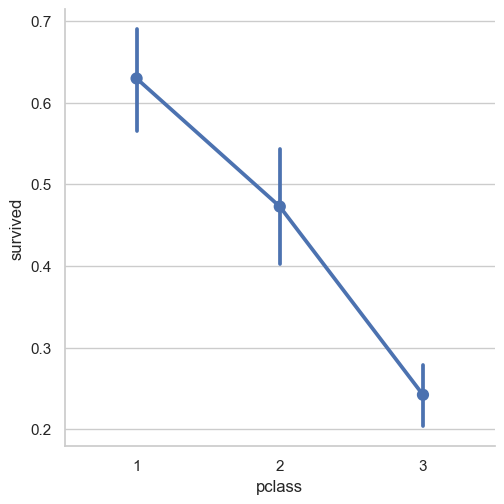

In [43]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = ttnc)